In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
def read_nested_dict_from_h5(file_path, group=None):
    if group is None:
        with h5py.File(file_path, 'r') as hf:
            return _read_group(hf)
    else:
        return _read_group(group)

def _read_group(group):
    data = {}
    for key, item in group.items():
        if isinstance(item, h5py.Dataset):
            data[key] = item[()]  # Read dataset into memory
        elif isinstance(item, h5py.Group):
            data[key] = _read_group(item)
    return data



In [3]:
# Load the h5 file containing the figures data
file_path = 'diag2diag-natcomm-figs.h5'
try:
    all_figs = read_nested_dict_from_h5(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

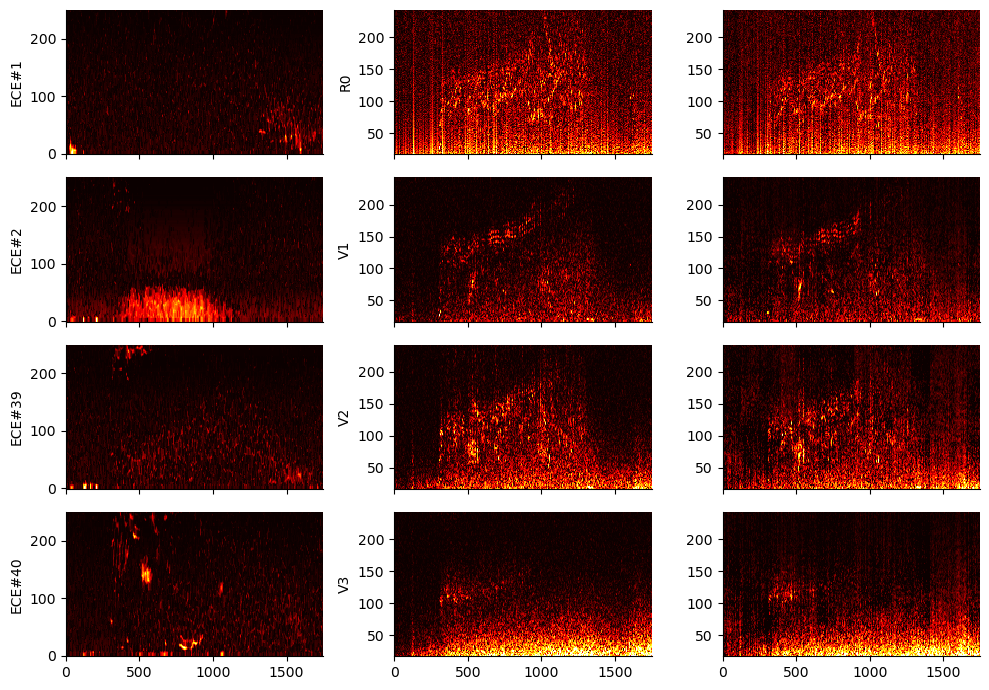

In [4]:
#fig2 Spectrograms
fig,axs = plt.subplots(ncols=3,nrows=4,figsize=(10,7),dpi=100,sharex=True)

for idx,chn in enumerate(['R0', 'V1', 'V2', 'V3']):
    axs[idx,1].pcolormesh(all_figs['fig2']['spectrogram'][chn]['truth']['time'],all_figs['fig2']['spectrogram'][chn]['truth']['freq'],all_figs['fig2']['spectrogram'][chn]['truth']['data'],cmap='hot',vmin=0,vmax=0.3)
    axs[idx,2].pcolormesh(all_figs['fig2']['spectrogram'][chn]['prediction']['time'],all_figs['fig2']['spectrogram'][chn]['prediction']['freq'],all_figs['fig2']['spectrogram'][chn]['prediction']['data'],cmap='hot',vmin=0,vmax=0.3)
    axs[idx,1].set(ylabel=chn)
    
for idx,chn in enumerate(['ECE#1','ECE#2','ECE#39','ECE#40']):
    axs[idx,0].pcolormesh(all_figs['fig2']['spectrogram'][f'ece#{idx+1}']['time'],all_figs['fig2']['spectrogram'][f'ece#{idx+1}']['freq'],all_figs['fig2']['spectrogram'][f'ece#{idx+1}']['data'],cmap='hot')
    axs[idx,0].set(ylabel=chn)


for i in range(4):
    for j in range(3):
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
plt.tight_layout()

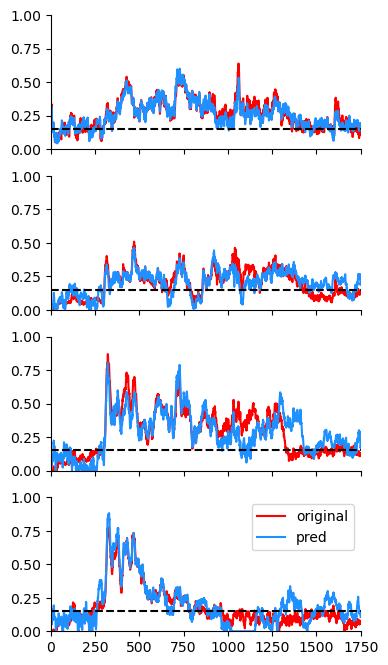

In [15]:
#fig2 ae detector
thr=0.15
fig,axs=plt.subplots(nrows=4,ncols=1,figsize=(4,8),sharex=True)

for idx,chn in enumerate(['r0','v1','v2','v3']):

    axs[idx].plot(all_figs['fig2']['ae_detector']['time'],all_figs['fig2']['ae_detector'][chn]['original'],label='original',c='red')    
    axs[idx].plot(all_figs['fig2']['ae_detector']['time'],all_figs['fig2']['ae_detector'][chn]['reconstructed'],label='pred',c='dodgerblue')

    axs[idx].axhline(y = thr, color = 'black', linestyle = '--')
    axs[idx].set(xlim=[0,1750],ylim=[0,1])
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['top'].set_visible(False)
_=axs[-1].legend()

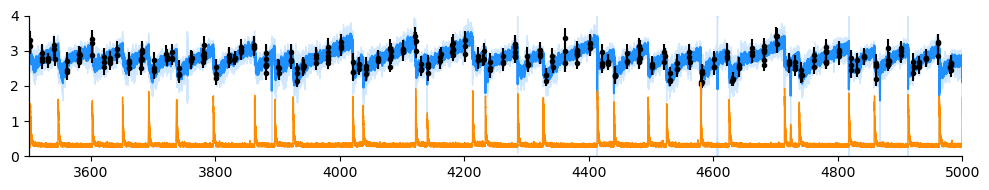

In [6]:
#Fig 4 Top

fig = plt.figure(figsize=(10,2),dpi=100)
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(all_figs['fig4']['top']['srts']['time'],all_figs['fig4']['top']['srts']['data'],label='Super res TS',color='dodgerblue')
ax1.fill_between(all_figs['fig4']['top']['srts']['time'],all_figs['fig4']['top']['srts']['data']-all_figs['fig4']['top']['srts']['err'],all_figs['fig4']['top']['srts']['data']+all_figs['fig4']['top']['srts']['err'],label='Super res TS',color='dodgerblue',alpha=0.2)
ax1.errorbar(all_figs['fig4']['top']['ts']['time'],all_figs['fig4']['top']['ts']['data'],yerr=all_figs['fig4']['top']['ts']['err'],color='black',fmt='.')

ax=ax1.twinx()
ax.plot(all_figs['fig4']['top']['da']['time'],all_figs['fig4']['top']['da']['data'],label='Da',color='darkorange',linewidth=1)
ax1.set(xlim=[3500,5000],ylim=[0,4])
ax.set(ylim=[-0.003,0.05],xlim=[3500,5000],yticks=[])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
# plt.savefig('fig4-top.svg')


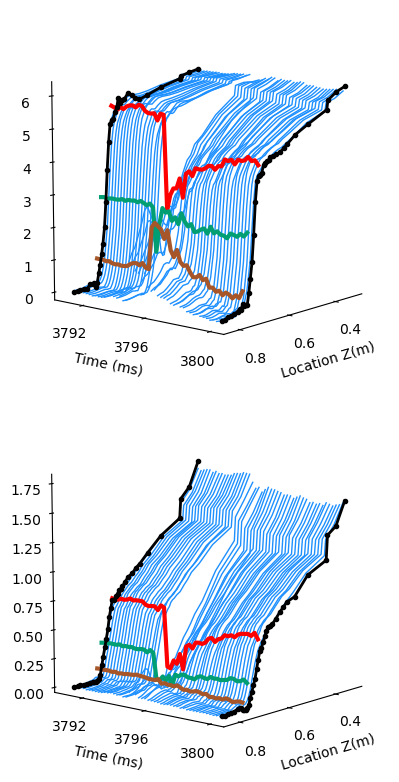

In [7]:

#Fig 4 right

fig,axs=plt.subplots(ncols=1,nrows=2,figsize=(4,8),dpi=100,subplot_kw={'projection': '3d'})

for time_idx in range(len(all_figs['fig4']['right']['srts']['Te']['time'])):
    for ax_idx,ts_nm in enumerate(['ne','Te']):
        line = axs[ax_idx].plot(all_figs['fig4']['right']['srts'][ts_nm]['location'], np.full_like(all_figs['fig4']['right']['srts'][ts_nm]['location'],all_figs['fig4']['right']['srts'][ts_nm]['time'][time_idx]), all_figs['fig4']['right']['srts'][ts_nm]['data'][time_idx,:],color='dodgerblue', linewidth=1)

for ln_idx,ln_clr in enumerate(['red',"#009E73","#a65628"]):
    for ax_idx,ts_nm in enumerate(['ne','Te']):
        line = axs[ax_idx].plot(np.full_like(all_figs['fig4']['right']['lines'][ts_nm]['time'],all_figs['fig4']['right']['lines'][ts_nm]['location'][ln_idx]), all_figs['fig4']['right']['lines'][ts_nm]['time'], all_figs['fig4']['right']['lines'][ts_nm]['data'][:,ln_idx],color=ln_clr, linewidth=3)

for ts_idx,ts_nm in enumerate(['ne','Te']):
    line = axs[ts_idx].plot(all_figs['fig4']['right']['ts'][ts_nm]['location'], np.full_like(all_figs['fig4']['right']['ts'][ts_nm]['location'],all_figs['fig4']['right']['ts'][ts_nm]['time'][0]), all_figs['fig4']['right']['ts'][ts_nm]['data'][0,:],color='k', marker='o',markersize=3,linewidth=2)
    line = axs[ts_idx].plot(all_figs['fig4']['right']['ts'][ts_nm]['location'], np.full_like(all_figs['fig4']['right']['ts'][ts_nm]['location'],all_figs['fig4']['right']['ts'][ts_nm]['time'][1]), all_figs['fig4']['right']['ts'][ts_nm]['data'][1,:],color='k', marker='o',markersize=3,linewidth=2)

for i,ts_nm in enumerate(['ne','Te']):
    axs[i].view_init(elev=10, azim=40, roll=0)
    axs[i].set(box_aspect=[1, 1, 1],xlabel="Location Z(m)",ylabel='Time (ms)',xticks=[0.4,0.6,0.8],yticks=[3792,3796,3800])
    axs[i].grid(False)
    axs[i].xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    axs[i].yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    axs[i].zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
plt.tight_layout()
# plt.savefig('fig4-3d.svg')

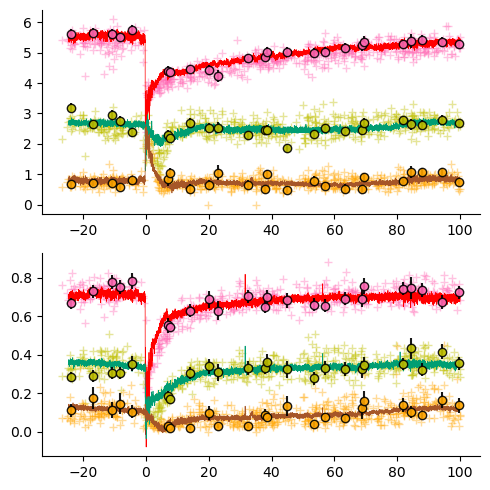

In [8]:
#Fig 4 left

fig,axs=plt.subplots(ncols=1,nrows=2,figsize=(5,5),dpi=100)

for v_te,v_ne in zip(all_figs['fig4']['left']['aggregated_elms']['Te'].values(),all_figs['fig4']['left']['aggregated_elms']['ne'].values()):
    for col_id,cl in zip([22, 15, 12],['hotpink', '#bfbf00', 'orange']):
        axs[0].plot(v_ne['time'],v_ne[f'ts_density_{col_id+1}'],marker='+',linestyle='',mfc = cl,mec=cl,alpha=0.4)
        axs[1].plot(v_te['time'],v_te[f'ts_temperature_{col_id+1}'],marker='+',linestyle='',mfc = cl,mec=cl,alpha=0.4)

for axs_id,ts_nm in enumerate(['ne','Te']):
    for col_id,cl,cl_real in zip(range(3),['hotpink', '#bfbf00', 'orange'],['red','#009E73','#a65628']):#['b','firebrick','k']):
        axs[axs_id].plot(all_figs['fig4']['left']['srts'][ts_nm]['time'],all_figs['fig4']['left']['srts'][ts_nm]['data'][col_id],c=cl_real,linewidth=0.5)
        axs[axs_id].errorbar(all_figs['fig4']['left']['ts'][ts_nm]['time'],all_figs['fig4']['left']['ts'][ts_nm]['data'][col_id],yerr=all_figs['fig4']['left']['ts'][ts_nm]['err'][col_id],marker='o',linestyle='',mfc = cl,mec='k',ecolor='k',alpha=0.9)


for axid in axs[:]:
    axid.spines['right'].set_visible(False)
    axid.spines['top'].set_visible(False)
    
plt.tight_layout()
# plt.savefig('fig4-2d.svg')

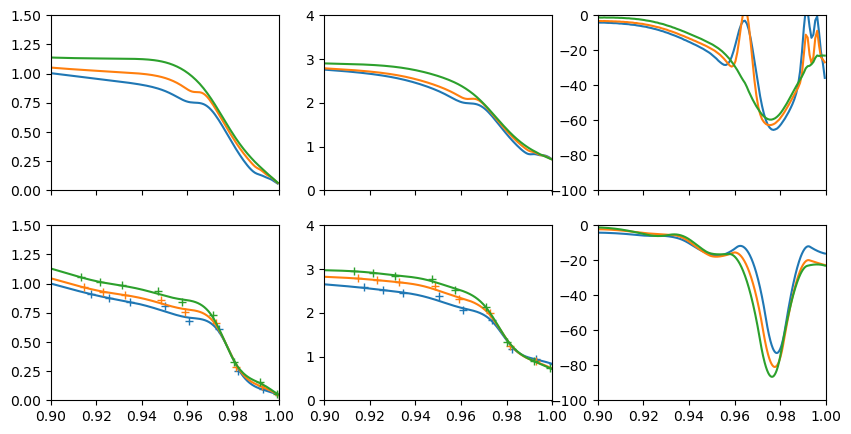

In [9]:
# Fig 5
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,5),sharex=True,sharey='col')

for idx,cl in enumerate(['C0','C1','C2']):
    axs[0,0].plot(all_figs['fig5']['b']['psi_n'],all_figs['fig5']['b'][f'Te_{idx+1}[keV]'],c=cl)
    axs[1,0].plot(all_figs['fig5']['e']['psi_n'],all_figs['fig5']['e'][f'Te_{idx+1}'],c=cl)
    axs[1,0].plot(all_figs['fig5']['e_scat'][f'psi_n{idx+1}'],all_figs['fig5']['e_scat'][f'Te_scatter{idx+1}'],'+',c=cl)
    axs[0,1].plot(all_figs['fig5']['c']['psi_n'],all_figs['fig5']['c'][f'ne_{idx+1}'],c=cl)
    axs[1,1].plot(all_figs['fig5']['f']['psi_n'],all_figs['fig5']['f'][f'ne_{idx+1}'],c=cl)
    axs[1,1].plot(all_figs['fig5']['f_scat'][f'psi_n{idx+1}'],all_figs['fig5']['f_scat'][f'ne_scatter{idx+1}'],'+',c=cl)
    axs[0,2].plot(all_figs['fig5']['d']['psi_n'],all_figs['fig5']['d'][f'grad_n{idx+1}'],c=cl)
    axs[1,2].plot(all_figs['fig5']['g']['psi_n'],all_figs['fig5']['g'][f'prof{idx+1}'],c=cl)
    axs[0,0].set(xlim=[0.9,1],ylim=[0,1.5])
    axs[0,1].set(ylim=[0,4])
    axs[0,2].set(ylim=[-100,0])

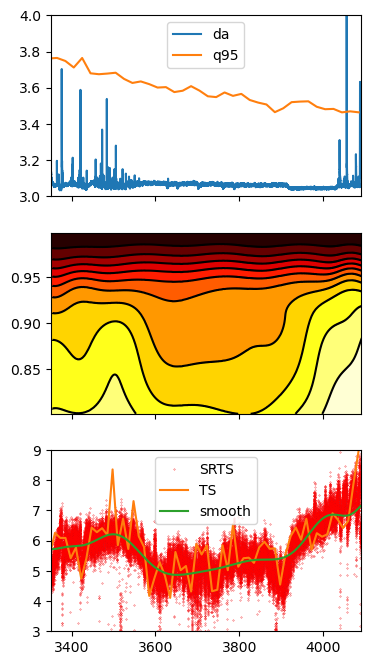

In [10]:
#Fig 6
fig,axs=plt.subplots(nrows=3,ncols=1,figsize=(4,8),sharex=True)

for k,v in all_figs['fig6']['a'].items():
    axs[0].plot(v['time'],v['data'],label=k)
axs[0].set(ylim=[3,4],xlim=[3350,4090])
axs[0].legend()

for k,v in all_figs['fig6']['c'].items():
    if k == 'SRTS':
        axs[2].plot(v['time'],v['data'],label=k,linestyle='',marker='.',markersize=0.5,markeredgecolor='red')
    else:
        axs[2].plot(v['time'],v['data'],label=k)

axs[2].set(ylim=[3,9])
axs[2].legend()

[X, Y] = np.meshgrid(all_figs['fig6']['b']['xx'], all_figs['fig6']['b']['yy'])
axs[1].contour(X, Y, all_figs['fig6']['b']['zz'],levels=10,colors='k')
axs[1].contourf(X, Y, all_figs['fig6']['b']['zz'],levels=10,cmap='hot')

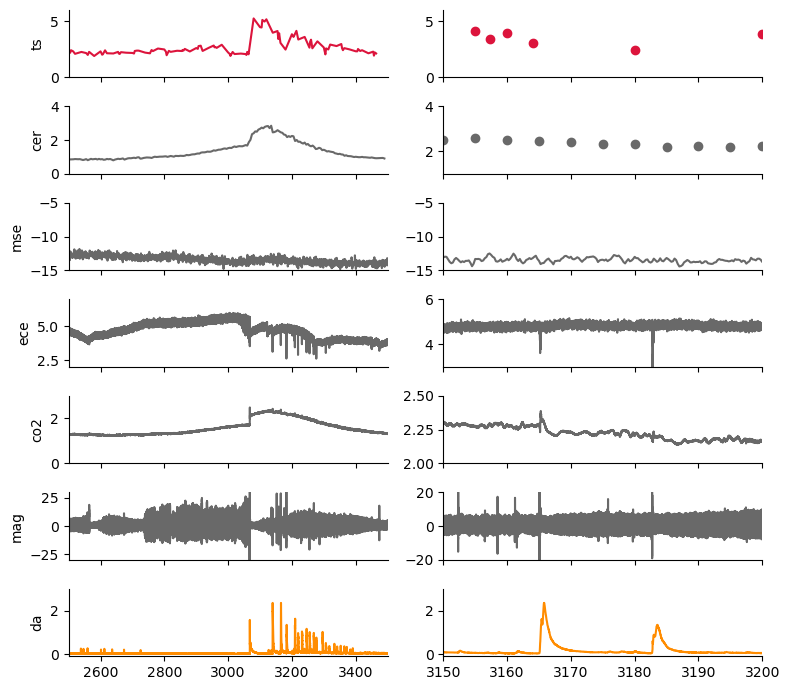

In [11]:
#Fig 8
rng=[2500,3500]

for k,v in all_figs['fig8'].items():
    tmb = np.argmin(np.abs(v['time']-rng[0]))
    tme = np.argmin(np.abs(v['time']-rng[1]))
    all_figs['fig8'][k]['time']=all_figs['fig8'][k]['time'][tmb:tme]
    all_figs['fig8'][k]['data']=all_figs['fig8'][k]['data'][tmb:tme]

fig,axs=plt.subplots(ncols=2,nrows=len(all_figs['fig8']),figsize=(8,7),sharex='col')

rng1={'da':[-.1,3],
    'ece':[2,7],
    'ts':[0,6],
    'co2':[0,3],
    'mag':[-30,30],
     'mse':[-15,-5],
    'cer':[0,4]}

rng2={'da':[-.1,3],
    'ece':[3,6],
    'ts':[0,6],
    'co2':[2,2.5],
    'mag':[-20,20],
     'mse':[-15,-5],
    'cer':[1,4]}

clr={'da':'darkorange',
    'ece':'#696969',
    'ts':'#dc143c',
    'co2':'#696969',
    'mag':'#696969',
     'mse':'#696969',
    'cer':'#696969'}


idx=0
for k in ['ts','cer','mse','ece','co2','mag','da']:
    v=all_figs['fig8'][k].copy()
    frq = 1/np.mean(v['time'][1:]-v['time'][:-1])
    if frq > 1:
        fmt = '-'
    else:
        fmt='o'
    axs[idx,0].plot(v['time'],v['data'],'-',c=clr[k])
    axs[idx,0].set(xlim=rng,ylim=rng1[k],ylabel=k)
    
    axs[idx,1].plot(v['time'],v['data'],fmt,c=clr[k])
    axs[idx,1].set(xlim=[3150,3200],ylim=rng2[k])
    
    axs[idx,0].spines['right'].set_visible(False)
    axs[idx,0].spines['top'].set_visible(False)
    axs[idx,1].spines['right'].set_visible(False)
    axs[idx,1].spines['top'].set_visible(False)
    idx+=1

plt.tight_layout()
# plt.savefig('fig8-diags.svg')


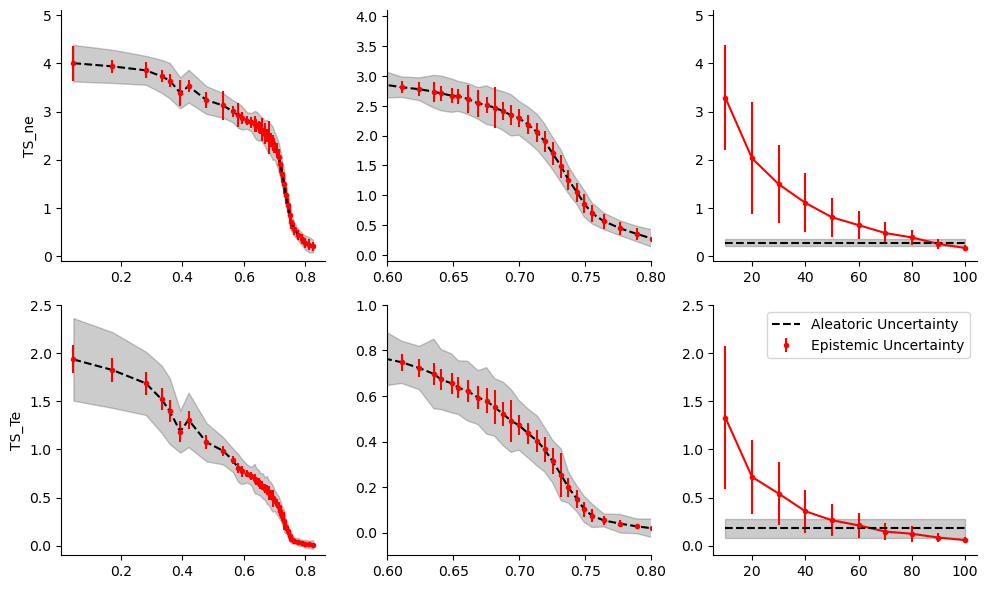

In [12]:
# Fig 9
    
fig,axs=plt.subplots(ncols=3,nrows=2,figsize=(10,6))
for idx,ts_nm in enumerate(['TS_ne','TS_Te']):

    axs[idx,0].fill_between(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed']-all_figs['fig9']['left'][ts_nm]['aleatoric']['error_processed'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed']+all_figs['fig9']['left'][ts_nm]['aleatoric']['error_processed'],alpha=0.2,color='k',label='Measured')
    axs[idx,0].errorbar(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['epistemic']['data_processed'],yerr=all_figs['fig9']['left'][ts_nm]['epistemic']['error_processed'],fmt='.',color='red',label='Reconstructed')
    axs[idx,0].plot(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed'],'--k')

    axs[idx,1].fill_between(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed']-all_figs['fig9']['left'][ts_nm]['aleatoric']['error_processed'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed']+all_figs['fig9']['left'][ts_nm]['aleatoric']['error_processed'],alpha=0.2,color='k',label='Measured')
    axs[idx,1].errorbar(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['epistemic']['data_processed'],yerr=all_figs['fig9']['left'][ts_nm]['epistemic']['error_processed'],fmt='.',color='red',label='Reconstructed')
    axs[idx,1].set(xlim=[0.6,0.8])
    axs[idx,1].plot(all_figs['fig9']['left'][ts_nm]['xaxis'],all_figs['fig9']['left'][ts_nm]['aleatoric']['data_processed'],'--k')

# Fig 9 UQ right
for idx,ts_nm in enumerate(['TS_ne','TS_Te']):
    axs[idx,2].errorbar(all_figs['fig9']['right'][ts_nm]['xaxis'],all_figs['fig9']['right'][ts_nm]['epistemic']['data'],yerr=all_figs['fig9']['right'][ts_nm]['epistemic']['error'],fmt='.',label=f'Epistemic Uncertainty',c='r')
    axs[idx,2].plot(all_figs['fig9']['right'][ts_nm]['xaxis'],all_figs['fig9']['right'][ts_nm]['epistemic']['data'],c='r')

    axs[idx,2].plot(all_figs['fig9']['right'][ts_nm]['xaxis'],all_figs['fig9']['right'][ts_nm]['aleatoric']['data'],c='k',linestyle='--',label=f'Aleatoric Uncertainty')
    axs[idx,2].fill_between(all_figs['fig9']['right'][ts_nm]['xaxis'],all_figs['fig9']['right'][ts_nm]['aleatoric']['data']-all_figs['fig9']['right'][ts_nm]['aleatoric']['error'],all_figs['fig9']['right'][ts_nm]['aleatoric']['data']+all_figs['fig9']['right'][ts_nm]['aleatoric']['error'],alpha=0.2,color='k')
plt.legend()

for i in range(2):
    for j in range(3):
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)

axs[0,0].set(ylim=[-0.1,5.1],ylabel='TS_ne')
axs[1,0].set(ylim=[-0.1,2.5],ylabel='TS_Te')
axs[0,1].set(ylim=[-0.1,4.1])
axs[1,1].set(ylim=[-0.1,1])
axs[0,2].set(ylim=[-0.1,5.1])
axs[1,2].set(ylim=[-0.1,2.5])

plt.tight_layout()

# plt.savefig('fig9-uq.svg', format='svg')


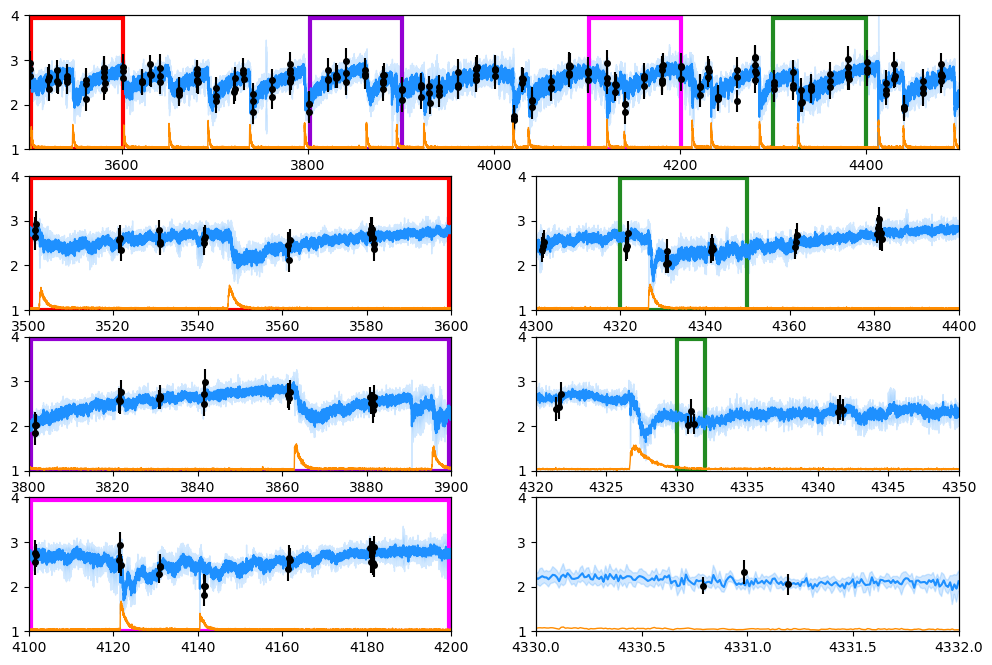

In [13]:
# Figure 10
fig = plt.figure(figsize=(12,8),dpi=100)
gs = GridSpec(4, 2, figure=fig)


ax_top = fig.add_subplot(gs[0, :])
ax_top.plot(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data'],label='Super res TS',color='dodgerblue')
ax_top.fill_between(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data']-all_figs['fig10']['top']['srts']['err'],all_figs['fig10']['top']['srts']['data']+all_figs['fig10']['top']['srts']['err'],label='Super res TS',color='dodgerblue',alpha=0.2)

ax_top.errorbar(all_figs['fig10']['top']['ts']['time'],all_figs['fig10']['top']['ts']['data'],yerr=all_figs['fig10']['top']['ts']['err'],color='k',ls='None',marker='o',markersize=4)
ax=ax_top.twinx()
ax.plot(all_figs['fig10']['top']['da']['time'],all_figs['fig10']['top']['da']['data'],label='Da',color='darkorange',linewidth=1)
ax_top.set(xlim=[3500,4500],ylim=[1,4])
ax.set(ylim=[0,0.1],yticks=[])


ax_old=ax_top
for idx,rng in enumerate([[4300,4400],[4320,4350],[4330,4332]]):
    ax1 = fig.add_subplot(gs[idx+1, 1])
    ax1.fill_between(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data']-all_figs['fig10']['top']['srts']['err'],all_figs['fig10']['top']['srts']['data']+all_figs['fig10']['top']['srts']['err'],label='Super res TS',color='dodgerblue',alpha=0.2)
    ax1.plot(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data'],label='Super res TS',color='dodgerblue')
    ax1.errorbar(all_figs['fig10']['top']['ts']['time'],all_figs['fig10']['top']['ts']['data'],yerr=all_figs['fig10']['top']['ts']['err'],color='k',ls='None',marker='o',markersize=4)
    ax=ax1.twinx()
    ax.plot(all_figs['fig10']['top']['da']['time'],all_figs['fig10']['top']['da']['data'],label='Da',color='darkorange',linewidth=1)
    ax1.set(xlim=rng,ylim=[1,4])
    ax.set(ylim=[0,0.1],xlim=rng,yticks=[])

    rect = patches.Rectangle((rng[0], 1), rng[1]-rng[0], 2.95, linewidth=3, edgecolor='forestgreen', facecolor='none')
    ax_old.add_patch(rect)
    ax_old=ax1
ax1.set(xticks=np.arange(rng[0],rng[1]+.1,0.5))

for idx,rng,clr in zip([0,1,2],[[3500,3600],[3800,3900],[4100,4200]],['red','darkviolet','magenta']):
    ax1 = fig.add_subplot(gs[idx+1, 0])
    ax1.fill_between(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data']-all_figs['fig10']['top']['srts']['err'],all_figs['fig10']['top']['srts']['data']+all_figs['fig10']['top']['srts']['err'],label='Super res TS',color='dodgerblue',alpha=0.2)
    ax1.plot(all_figs['fig10']['top']['srts']['time'],all_figs['fig10']['top']['srts']['data'],label='Super res TS',color='dodgerblue')
    ax1.errorbar(all_figs['fig10']['top']['ts']['time'],all_figs['fig10']['top']['ts']['data'],yerr=all_figs['fig10']['top']['ts']['err'],color='k',ls='None',marker='o',markersize=4)
    ax=ax1.twinx()
    ax.plot(all_figs['fig10']['top']['da']['time'],all_figs['fig10']['top']['da']['data'],label='Da',color='darkorange',linewidth=1)
    ax1.set(xlim=rng,ylim=[1,4])
    ax.set(ylim=[0,0.1],xlim=rng,yticks=[])
    rect = patches.Rectangle((rng[0]+3, 1), rng[1]-rng[0]-1, 2.95, linewidth=3, edgecolor=clr, facecolor='none')
    ax_top.add_patch(rect)
    rect = patches.Rectangle((rng[0]+0.5, 1), rng[1]-rng[0]-1, 2.95, linewidth=3, edgecolor=clr, facecolor='none')
    ax1.add_patch(rect)


# plt.savefig('fig10-bunch.svg')
# plt.savefig('fig10-bunch.png')
